# How do I make inferential statistics? (SOLUTIONS)

In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

We will use the cats dataset from the MASS package. Python does not have MASS, so we will load a CSV version of the dataset. Here is a small embedded version for convenience:

In [5]:
# Load cats dataset
cats = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/cats.csv")
cats = cats.drop(columns=['rownames'])

When we conduct inferential statistics, we are simply formulating the same types of questions that we asked in descriptive statistics, but in a mathematically rigorous way.

For example, to test whether body weights differ between male and female cats, we can run a two-sample t-test.

In [6]:
cats_male = cats[cats["Sex"] == "M"]
cats_female = cats[cats["Sex"] == "F"]

stats.ttest_ind(cats_male["Bwt"], cats_female["Bwt"], equal_var=False)

TtestResult(statistic=8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363)

## Exercise 1

Is there a difference in mean heart weight between male and female cats? Perform a Welch t-test (the Python default when equal_var=False).

In [7]:
# Exercise 1
stats.ttest_ind(cats_male["Hwt"], cats_female["Hwt"], equal_var=False)

TtestResult(statistic=6.5178560174655376, pvalue=1.1859905829476679e-09, df=140.60783744154165)

You may have realised that the function performed the Welch t-test (with the setting ```equal_var=False```). Why might this be good?

## Exercise 2

Re-run the t-test assuming equal variances (```equal_var=True```). Compare the confidence intervals of both tests. Which is more conservative?

In [8]:
# Exercise 2
# Welch test (unequal variances)
welch = stats.ttest_ind(cats_male["Hwt"], cats_female["Hwt"], equal_var=False)

# Classical two-sample t-test (equal variances)
classical = stats.ttest_ind(cats_male["Hwt"], cats_female["Hwt"], equal_var=True)

welch, classical

(TtestResult(statistic=6.5178560174655376, pvalue=1.1859905829476679e-09, df=140.60783744154165),
 TtestResult(statistic=5.353924104107808, pvalue=3.3797857526008547e-07, df=142.0))

To compute confidence intervals, Python requires doing it manually:

In [9]:
# 95% CI for difference in means (Welch)
mean_diff = cats_male["Hwt"].mean() - cats_female["Hwt"].mean()
se = np.sqrt(
    cats_male["Hwt"].var(ddof=1)/len(cats_male) +
    cats_female["Hwt"].var(ddof=1)/len(cats_female)
)

tcrit = stats.t.ppf(0.975, df=min(len(cats_male), len(cats_female))-1)
(lower, upper) = (mean_diff - tcrit*se, mean_diff + tcrit*se)
(lower, upper)

(1.4656669602994148, 2.7754385452939134)

## Exercise 3

Write out the hypotheses formally.

$$H_0:\ \mu_M = \mu_F$$
$$H_A:\ \mu_M \ne \mu_F$$

## Exercise 4

We assumed that the sampling distribution of the mean is approximately normal. Which mathematical theorem allows this?

The central limit theorem. This says that as long as we have over 30 samples in each group in our study, the mean of the data is normally distributed.

## Exercise 5

Do you expect an association between body and heart weight? (Write your reasoning.)

Yes, it seems intuiative that as a cat's heart weight grows, the body weight should grow to a limit.

## Exercise 6

Loook at the scatter plot below. Describe the relationship.

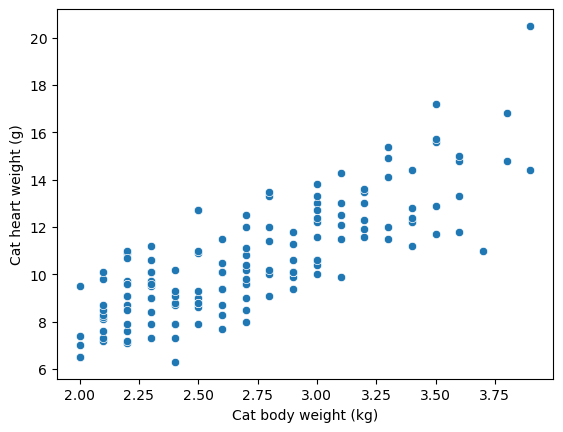

In [10]:
sns.scatterplot(data=cats, x="Bwt", y="Hwt")
plt.xlabel("Cat body weight (kg)")
plt.ylabel("Cat heart weight (g)")
plt.show()

There is a proportional relationship between the cats body weight and the cats heart weight. It seems to be as one goes up the other goes up.

## Exercise 7

Run the Pearson's correlation using the ```stats.pearsonr``` function. Write out your hypotheses and interpret the p-value below.

In [11]:
stats.pearsonr(cats["Bwt"], cats["Hwt"])

PearsonRResult(statistic=0.8041274235087927, pvalue=6.969044612859244e-34)

Our null hypothesis was that:
$$H_{0}: r = 0,$$
with the alternative being that:
$$H_{A}: r \neq 0.$$

The two are highly statistically correlated at 0.8 (p-value = $6.9 \times 10^{34}$). We may reject the null in favour of the alternative.